In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import numpy as np

data_path = '/opt/ml/input/data/train/train_added_label.csv'
data_df = pd.read_csv(data_path)
mask_labels = data_df['mask'].values.tolist()
incorrect_labels = data_df['incorrect'].values.tolist()
normal_labels = data_df['normal'].values.tolist()

In [10]:
labels_dict = defaultdict(int)

for mask, incorrect, normal in zip(mask_labels, incorrect_labels, normal_labels):
    labels_dict[mask] += 5
    labels_dict[incorrect] += 1
    labels_dict[normal] += 1

keys = list(labels_dict.keys())
keys.sort()

label_list = [labels_dict[key] for key in keys]

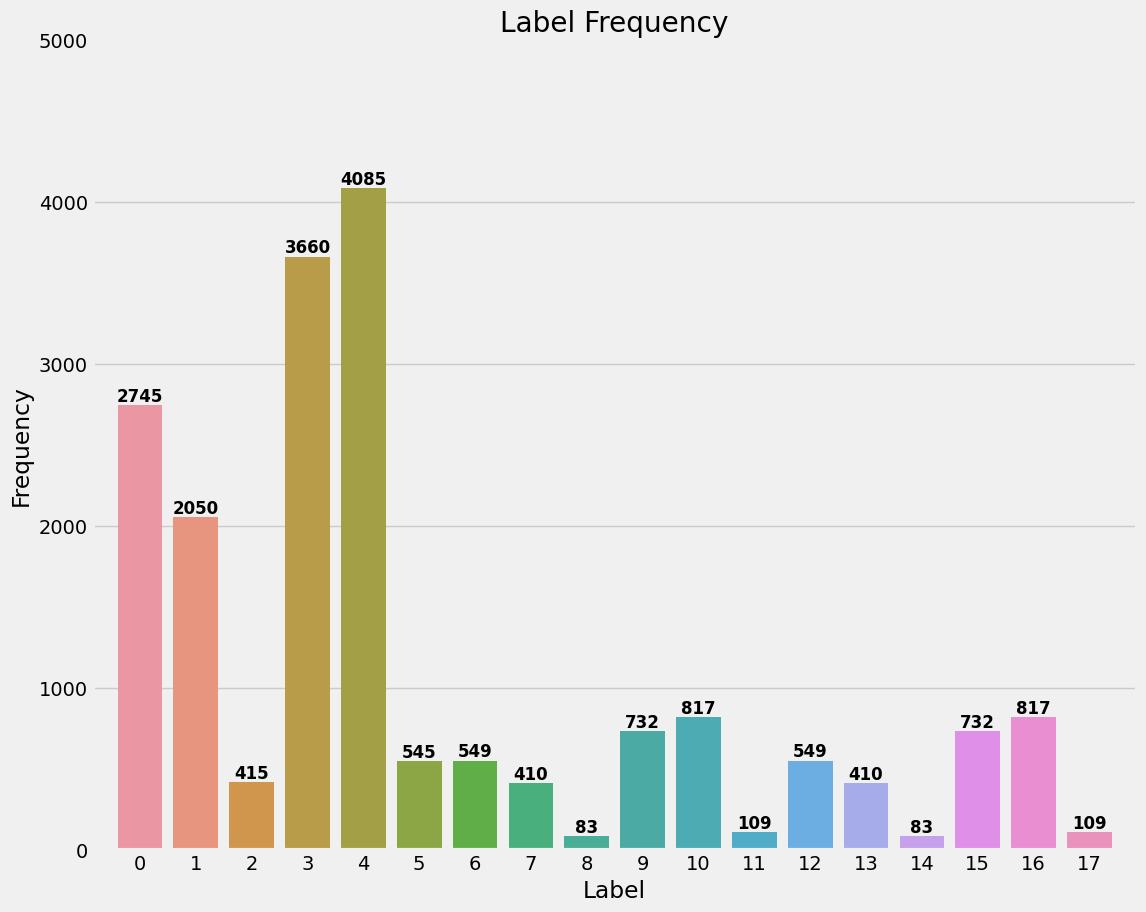

In [11]:
mpl.style.use('fivethirtyeight')

flg, ax = plt.subplots(1, 1, figsize=(12, 10))

ax = sns.barplot(x=keys, y=label_list)

ax.margins(0.025)
ax.set_title('Label Frequency')
ax.set_ylim(0, 5000)
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')

for label, label_count in zip(keys, label_list):
    ax.text(x=label, y=label_count, s=label_count,
        va='bottom', ha='center', fontsize=12, fontweight='semibold'
    )

plt.show()

In [12]:
class cfg:
    data_dir = '/opt/ml/input/data/train'  
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/train.csv'

In [13]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3',
             'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}

df = pd.read_csv(cfg.df_path)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


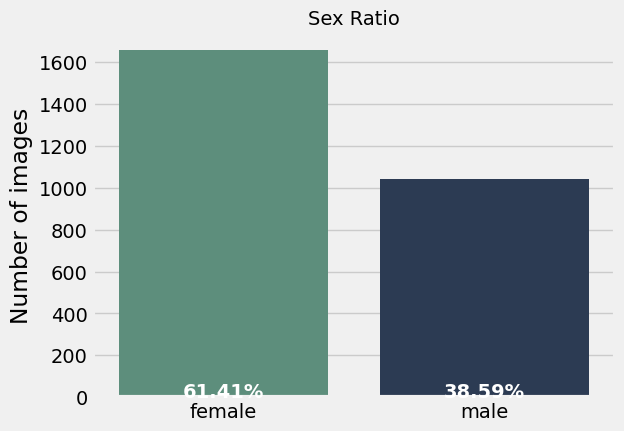

In [14]:
plt.figure(figsize=(6, 4.5)) 
ax = sns.countplot(x = 'gender', data = df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(2), ['female', 'male'] )
plt.title('Sex Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = df['gender'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

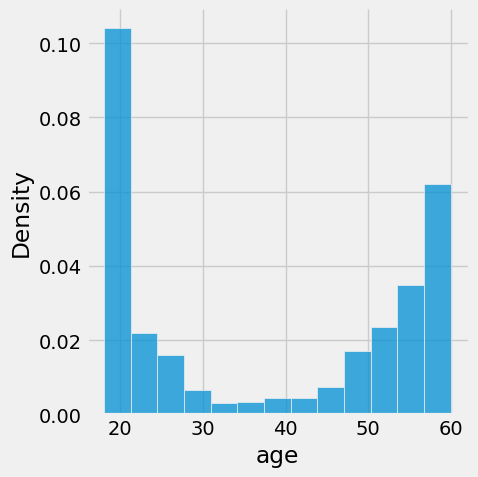

In [15]:
sns.displot(df, x="age", stat="density")
plt.show()

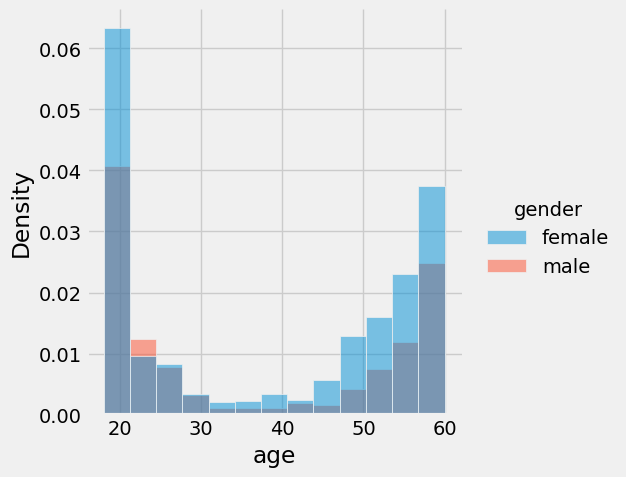

In [16]:
sns.displot(df, x="age", hue="gender", stat="density")
plt.show()

In [17]:
df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

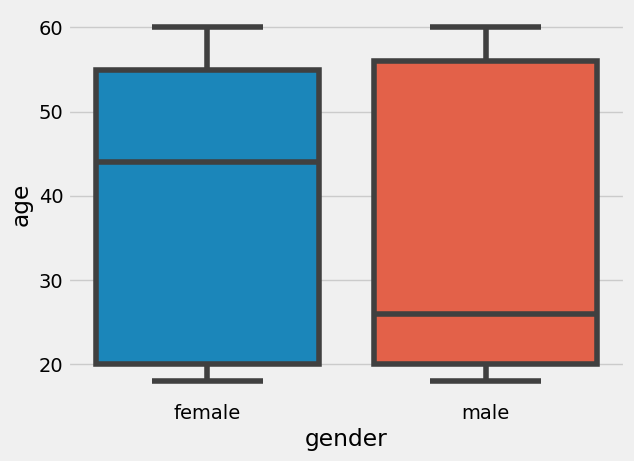

In [18]:
sns.boxplot(x='gender', y='age', data=df)
plt.show()